# Project: Investigate a Dataset (SOCCER DataSet Analysis and Visualization!)
# Provided by Elhoussini Fawzy
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In the current work, a data analytics and visualization were performed of the data from the soccer database
Later an attempt to predict the winner of soccer games based off the league, teams and results availabe should be done.
After Importing and loading data, An analysis were done for following tables:
Analyzing Country Table
Analyzing League Table
Analyzing Player Table
Analyzing Player Attributes Table
Analyzing Team Table
Analyzing Team Attributes Table
and then Conclusion was completed


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

####################################################

# import needed lilbrarys 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3 as sq
from sklearn.model_selection import train_test_split
import sklearn
#import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
#from xgboost import XGBRegressor
from sklearn.ensemble import (RandomForestClassifier)
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import neighbors
#from sklearn import cross_validation
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [18]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#######################################3

#Establish connection to the DB 
#con = sq.connect("/database.sqlite")
con = sq.connect('database.sqlite')
cursor = con.cursor()table_names = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())
#Reading data
# team_att = pd.read_sql_query("SELECT * from Team_Attributes", con)
# team = pd.read_sql_query("SELECT * from Team", con)
# match = pd.read_sql_query("SELECT * from Match", con)

# match = match[['date', 'home_team_goal', 'away_team_goal', 'home_team_api_id', 'away_team_api_id', 
#              'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession',
#              'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD',
#              'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD',
#              'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']]

#######


[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


Read all sql tables into data frames to be analyzed.

In [79]:
player_table = pd.read_sql_query("SELECT * FROM Player", con)
player_att_table = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
match_table = pd.read_sql_query("SELECT * FROM Match", con)
league_table = pd.read_sql_query("SELECT * FROM League", con)
country_table = pd.read_sql_query("SELECT * FROM Country", con)
team_table = pd.read_sql_query("SELECT * FROM Team", con)
team_att_table = pd.read_sql_query("SELECT * FROM Team_Attributes", con)


# Data Analysis and Visualization

# Analyzing Country Table

In [21]:
print("Dimension of Country Table is: {}".format(country_table.shape))
print(100*"*")
print(country_table.info())
print(100*"*")
print(country_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(country_table.describe())
print(100*"*")
print(country_table.isnull().sum(axis=0))

Dimension of Country Table is: (11, 2)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
****************************************************************************************************
               name
count            11
unique           11
top     Switzerland
freq              1
****************************************************************************************************
                 id
count     11.000000
mean   12452.090909
std     8215.308472
min        1.000000
25%     6289.000000
50%    13274.000000
75%    18668.000000
max    24558.000000
****************************************************************************************************
id      0
name    0
dtype: int64


In [22]:
country_table

id         name
0       1      Belgium
1    1729      England
2    4769       France
3    7809      Germany
4   10257        Italy
5   13274  Netherlands
6   15722       Poland
7   17642     Portugal
8   19694     Scotland
9   21518        Spain
10  24558  Switzerland


# Analyzing League Table

In [23]:
print("Dimension of League Table is: {}".format(league_table.shape))
print(100*"*")
print(league_table.info())
print(100*"*")
print(league_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(league_table.describe())
print(100*"*")
print(league_table.isnull().sum(axis=0))

Dimension of League Table is: (11, 3)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes
None
****************************************************************************************************
                          name
count                       11
unique                      11
top     Belgium Jupiler League
freq                         1
****************************************************************************************************
                 id    country_id
count     11.000000     11.000000
mean   12452.090909  12452.090909
std     8215.308472   8215.308472
min        1.000000      1.000000
25%     6289.000000   6289.000000
50%    13274.000000  13274.000000
75%    

In [24]:
league_table

id  country_id                      name
0       1           1    Belgium Jupiler League
1    1729        1729    England Premier League
2    4769        4769            France Ligue 1
3    7809        7809     Germany 1. Bundesliga
4   10257       10257             Italy Serie A
5   13274       13274    Netherlands Eredivisie
6   15722       15722        Poland Ekstraklasa
7   17642       17642  Portugal Liga ZON Sagres
8   19694       19694   Scotland Premier League
9   21518       21518           Spain LIGA BBVA
10  24558       24558  Switzerland Super League

Data is available only for the european leagues. Note that top 5 leaguesa are: Ligue 1, Bundesliga, Serie A, Premier League and LIGA BBVA

# Analyzing Player Table

In [25]:
print("Dimension of Player Table is: {}".format(player_table.shape))
print(100*"*")
print(player_table.info())
print(100*"*")
print(player_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(player_table.describe())
print(100*"*")
print(player_table.isnull().sum(axis=0))
#Player table has no missing data

Dimension of Player Table is: (11060, 7)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB
None
****************************************************************************************************
       player_name             birthday
count        11060                11060
unique       10848                 5762
top         Danilo  1989-03-02 00:00:00
freq             7                   10
***************************************************************************

<a id='eda'></a>
## Exploratory Data Analysis (Player Table)



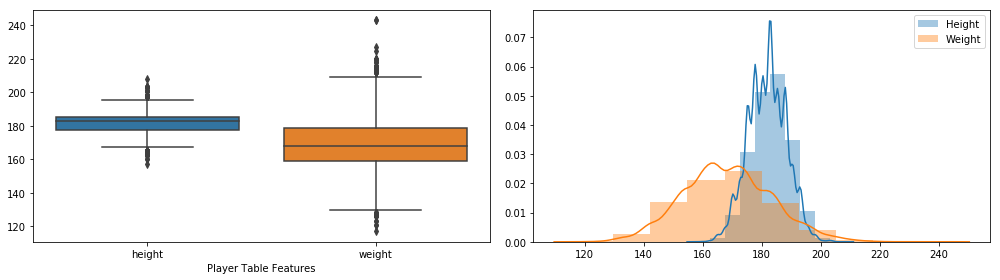

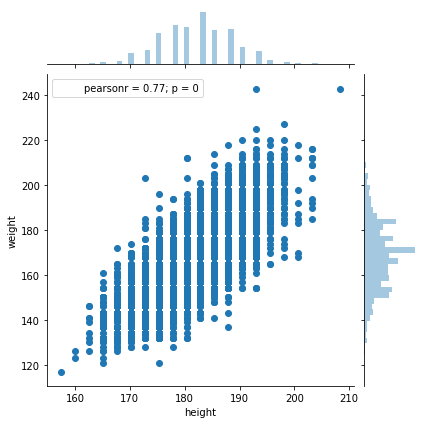

In [26]:
fig1, ax1 = plt.subplots(nrows = 1, ncols = 2)
fig1.set_size_inches(14,4)
sns.boxplot(data = player_table.loc[:,["height",'weight']], ax = ax1[0])
ax1[0].set_xlabel('Player Table Features')
ax1[0].set_ylabel('')
sns.distplot(a = player_table.loc[:,["height"]], bins= 10, kde = True, ax = ax1[1], \
            label = 'Height')
sns.distplot(a = player_table.loc[:,["weight"]], bins= 10, kde = True, ax = ax1[1], \
            label = 'Weight')
ax1[1].legend()
sns.jointplot(x='height',y = 'weight',data = player_table,kind = 'scatter')
fig1.tight_layout()

Finding the cardinality for continuous variable for both the weight and height features

In [27]:
print("Cardinality of Feature: Height - {:0.3f}%".format( \
        100 * (len(np.unique(player_table.loc[:,'height'])) / len(player_table.loc[:,'height']))))
print("Cardinality of Feature: Weight - {:0.3f}%".format( \
        100 * (len(np.unique(player_table.loc[:,'weight'])) / len(player_table.loc[:,'weight']))))

Cardinality of Feature: Height - 0.181%
Cardinality of Feature: Weight - 0.452%


Very low cardinality for continuous variable for both the weight and height features considering we have 11060 instances. As expected instances from both the weight and height features follow a normal distribution and follow a linear relationship.

# Analyzing Player Attributes Table

In [29]:
print("Dimension of Player Attributes Table is: {}".format(player_att_table.shape))
print(100*"*")
print(player_att_table.info())
print(100*"*")
print(player_att_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(player_att_table.describe())
print(100*"*")
print(player_att_table.isnull().sum(axis=0))
#Player Attributes Table has some missing data

Dimension of Player Attributes Table is: (183978, 42)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null 

<a id='eda'></a>
## Exploratory Data Analysis (Player Attributes Table)



In [30]:
np.unique(player_att_table.dtypes.values)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [31]:
player_att_table.select_dtypes(include =['float64','int64']).head().\
loc[:,player_att_table.select_dtypes(include =['float64','int64']).columns[3:]].head()

overall_rating  potential  crossing  finishing  heading_accuracy  \
0            67.0       71.0      49.0       44.0              71.0   
1            67.0       71.0      49.0       44.0              71.0   
2            62.0       66.0      49.0       44.0              71.0   
3            61.0       65.0      48.0       43.0              70.0   
4            61.0       65.0      48.0       43.0              70.0   

   short_passing  volleys  dribbling  curve  free_kick_accuracy     ...       \
0           61.0     44.0       51.0   45.0                39.0     ...        
1           61.0     44.0       51.0   45.0                39.0     ...        
2           61.0     44.0       51.0   45.0                39.0     ...        
3           60.0     43.0       50.0   44.0                38.0     ...        
4           60.0     43.0       50.0   44.0                38.0     ...        

   vision  penalties  marking  standing_tackle  sliding_tackle  gk_diving  \
0    54.0       48.0     65.0             69.0            69.0        6.0   
1    54.0       48.0     65.0             69.0            69.0        6.0   
2    54.0       48.0     65.0             66.0            69.0        6.0   
3    53.0       47.0     62.0             63.0            66.0        5.0   
4    53.0       47.0     62.0             63.0            66.0        5.0   

   gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0         11.0        10.0             8.0          8.0  
1         11.0        10.0             8.0          8.0  
2         11.0        10.0             8.0          8.0  
3         10.0         9.0             7.0          7.0  
4         10.0         9.0             7.0          7.0  

[5 rows x 35 columns]

Analyze the correlation between the continuous features. We should see a positive correlation between the attacking features, a positive correlation between the defensive features and a negative correlation between the attacking and defensive features.

In [34]:
corr2 = player_att_table.select_dtypes(include =['float64','int64']).\
loc[:,player_att_table.select_dtypes(include =['float64','int64']).columns[3:]].corr()

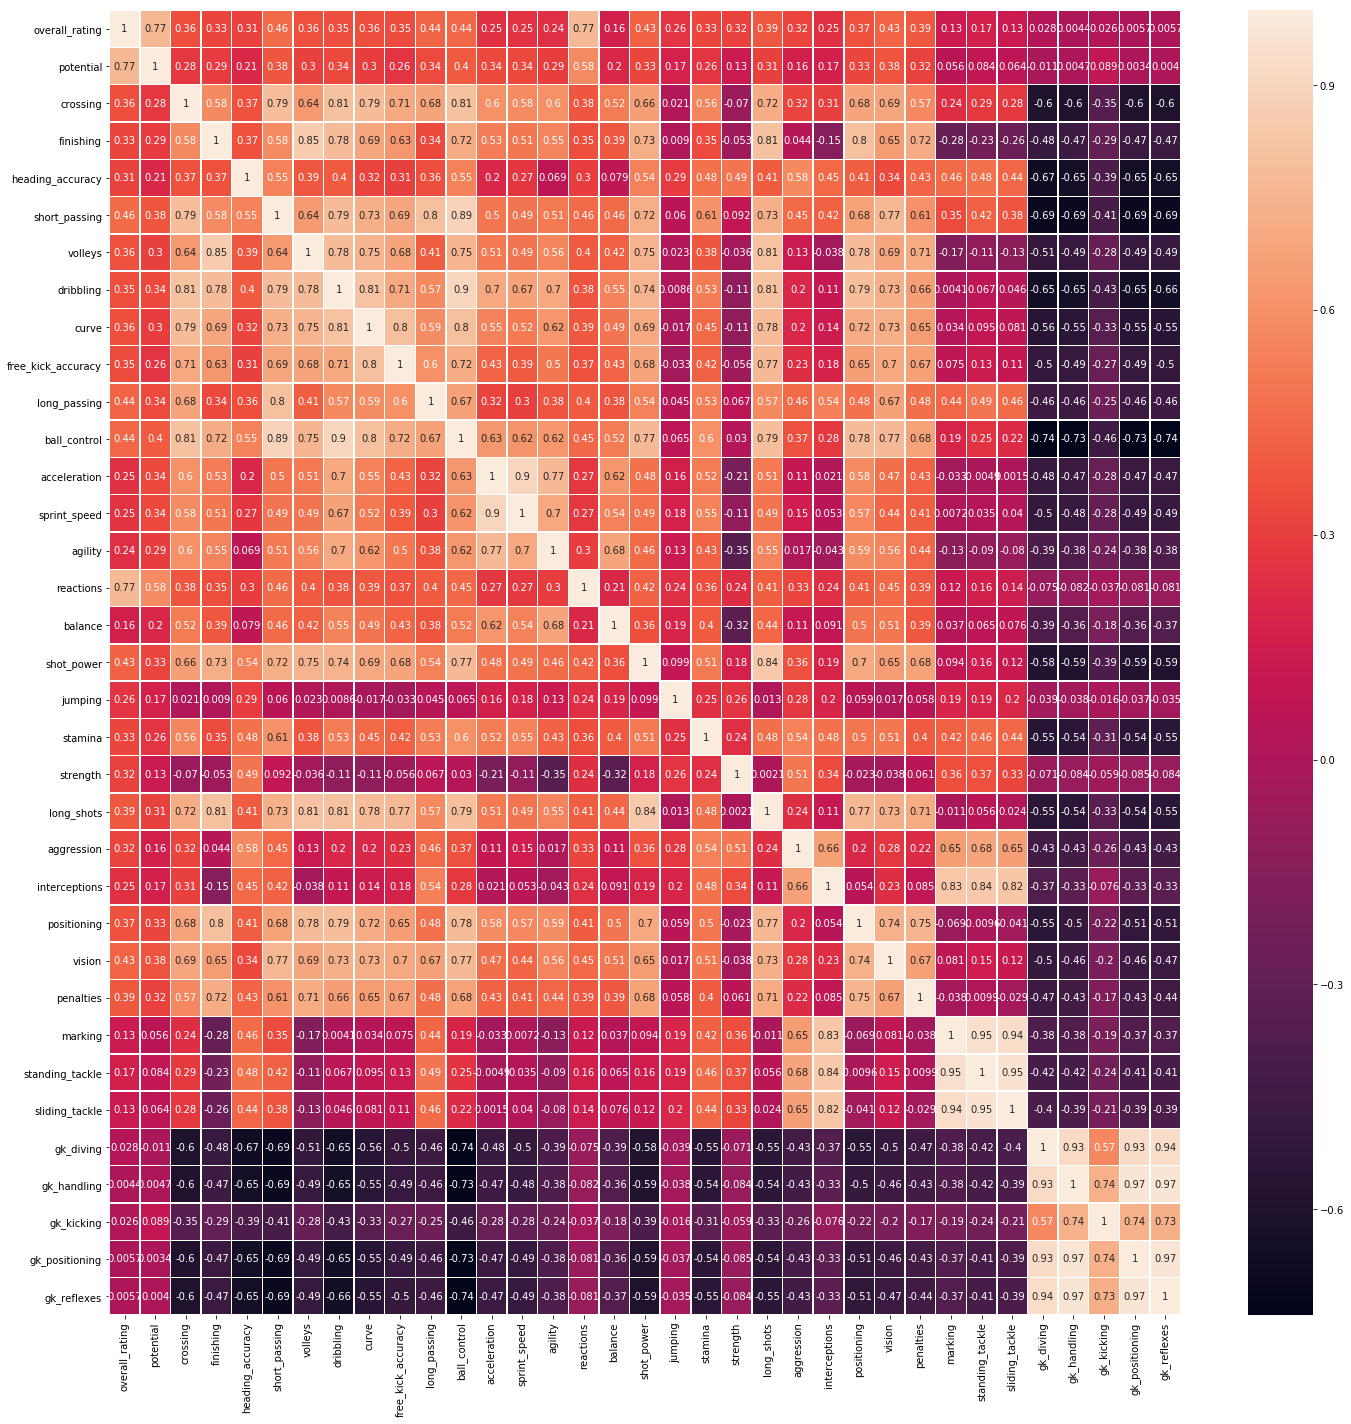

In [35]:
fig2,ax2 = plt.subplots(nrows = 1,ncols = 1)
fig2.set_size_inches(w=24,h=24)
sns.heatmap(corr2,annot = True,linewidths=0.5,ax = ax2)

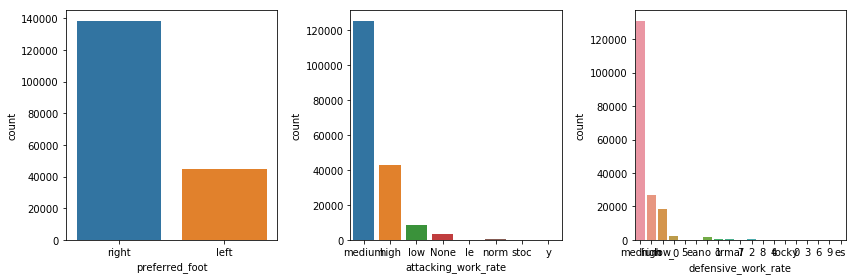

In [36]:
fig3, ax3 = plt.subplots(nrows = 1, ncols = 3)
fig3.set_size_inches(12,4)
sns.countplot(x = player_att_table['preferred_foot'],ax = ax3[0])
sns.countplot(x = player_att_table['attacking_work_rate'],ax = ax3[1])
sns.countplot(x = player_att_table['defensive_work_rate'],ax = ax3[2])
fig3.tight_layout()

Figure out which columns have strange attacking and defensive work rate. Is there a correlation between attacking and defensive work rate values? If one is strange, is the other strange?

In [37]:
print(player_att_table['attacking_work_rate'].value_counts())
print(100*'*')
print(player_att_table['defensive_work_rate'].value_counts())
print(100*'*')
print(player_att_table.shape)

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64
****************************************************************************************************
medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64
****************************************************************************************************
(183978, 42)


The levels for both the attacking work rate and defensive work rate cateorical features should be 'low', 'medium', and 'high'. Note that they also account for the majority of instances. The remaining of the levels do not make sense so remove the instances that contain them.

In [38]:
player_att_table.loc[~(player_att_table['attacking_work_rate'].\
                                                  isin(['medium','high','low'])\
                       | player_att_table['defensive_work_rate'].isin(['medium','high','low'])),:].head()

id  player_fifa_api_id  player_api_id                 date  \
373  374              156626          46447  2010-08-30 00:00:00   
374  375              156626          46447  2010-02-22 00:00:00   
375  376              156626          46447  2008-08-30 00:00:00   
376  377              156626          46447  2007-08-30 00:00:00   
377  378              156626          46447  2007-02-22 00:00:00   

     overall_rating  potential preferred_foot attacking_work_rate  \
373            64.0       71.0          right                None   
374            64.0       71.0          right                None   
375            66.0       71.0          right                None   
376            68.0       75.0          right                None   
377            66.0       65.0          right                None   

    defensive_work_rate  crossing     ...       vision  penalties  marking  \
373                  _0      41.0     ...         61.0       39.0     62.0   
374                  _0      41.0     ...         61.0       58.0     62.0   
375                  _0      41.0     ...         61.0       58.0     67.0   
376                  _0      41.0     ...         61.0       58.0     69.0   
377                  _0      41.0     ...         61.0       55.0     66.0   

     standing_tackle  sliding_tackle  gk_diving  gk_handling  gk_kicking  \
373             61.0            57.0       15.0         14.0        13.0   
374             61.0            57.0        6.0         20.0        45.0   
375             61.0            57.0        6.0         20.0        45.0   
376             64.0            57.0        6.0         20.0        45.0   
377             63.0            57.0        6.0          9.0        45.0   

     gk_positioning  gk_reflexes  
373            10.0         12.0  
374            20.0         20.0  
375            20.0         20.0  
376            20.0         20.0  
377            13.0         10.0  

[5 rows x 42 columns]

In [39]:
player_att_table_updated1 = player_att_table.loc[(player_att_table['attacking_work_rate'].\
                                                  isin(['medium','high','low'])\
                       & player_att_table['defensive_work_rate'].isin(['medium','high','low'])),:]
print(player_att_table_updated1.shape)
player_att_table_updated1.head()

(176161, 42)


id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

      ...       vision  penalties  marking  standing_tackle  sliding_tackle  \
0     ...         54.0       48.0     65.0             69.0            69.0   
1     ...         54.0       48.0     65.0             69.0            69.0   
2     ...         54.0       48.0     65.0             66.0            69.0   
3     ...         53.0       47.0     62.0             63.0            66.0   
4     ...         53.0       47.0     62.0             63.0            66.0   

   gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0        6.0         11.0        10.0             8.0          8.0  
1        6.0         11.0        10.0             8.0          8.0  
2        6.0         11.0        10.0             8.0          8.0  
3        5.0         10.0         9.0             7.0          7.0  
4        5.0         10.0         9.0             7.0          7.0  

[5 rows x 42 columns]

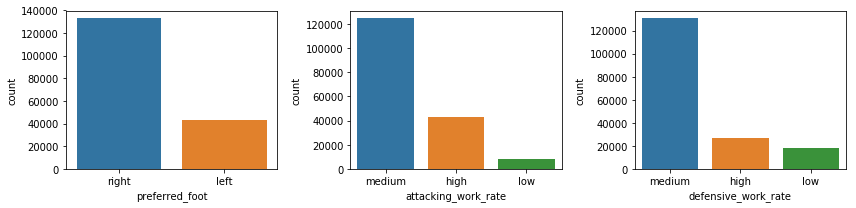

In [40]:
fig4, ax4 = plt.subplots(nrows = 1, ncols = 3)
fig4.set_size_inches(12,3)
sns.countplot(x = player_att_table_updated1['preferred_foot'],ax = ax4[0])
sns.countplot(x = player_att_table_updated1['attacking_work_rate'],ax = ax4[1])
sns.countplot(x = player_att_table_updated1['defensive_work_rate'],ax = ax4[2])
fig4.tight_layout()

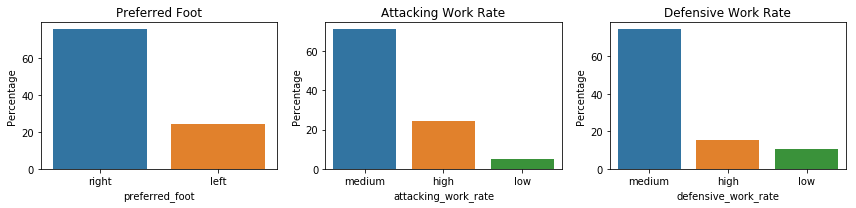

In [43]:
fig4, ax4 = plt.subplots(nrows = 1, ncols = 3)
fig4.set_size_inches(12,3)
sns.barplot(x ='preferred_foot', y = 'preferred_foot', data = player_att_table_updated1,\
            estimator = lambda x: len(x)/len(player_att_table_updated1) * 100, ax = ax4[0],\
           orient = 'v')
ax4[0].set(ylabel = 'Percentage',title = 'Preferred Foot')
sns.barplot(x ='attacking_work_rate', y = 'attacking_work_rate', data = player_att_table_updated1,\
            estimator = lambda x: len(x)/len(player_att_table_updated1) * 100, ax = ax4[1],\
           orient = 'v')
ax4[1].set(ylabel = 'Percentage',title = 'Attacking Work Rate')
sns.barplot(x ='defensive_work_rate', y = 'defensive_work_rate', data = player_att_table_updated1,\
            estimator = lambda x: len(x)/len(player_att_table_updated1) * 100, ax = ax4[2],\
           orient = 'v')
ax4[2].set(ylabel = 'Percentage',title = 'Defensive Work Rate')
fig4.tight_layout()

In [44]:
att_work_rate = player_att_table_updated1.groupby('attacking_work_rate').size().values.tolist()
def_work_rate = player_att_table_updated1.groupby('defensive_work_rate').size().values.tolist()


In [46]:
print("Attacking work rate factor, Medium, accounts for: {:0.3f}% of features".format(100 * att_work_rate[2]/np.sum(att_work_rate)))
print("Defensive work rate factor, Medium, accounts for: {:0.3f}% of features".format(100 * def_work_rate[2]/np.sum(def_work_rate)))

Attacking work rate factor, Medium, accounts for: 70.885% of features
Defensive work rate factor, Medium, accounts for: 74.230% of features


Percentage of rows eliminated due to invalid/strange attacking and defensive work rate values:

In [48]:
print("Percentage of instances removed from player attributes table: {:0.2f}%".\
      format(100* (1 - player_att_table_updated1.shape[0]/player_att_table.shape[0])))
print("We removed {} instances from Player Attributes table".\
      format(-player_att_table_updated1.shape[0] + player_att_table.shape

SyntaxError: unexpected EOF while parsing (<ipython-input-48-df75be7e15ec>, line 2)

In [49]:
print("Dimension of Player Attributes Table Updated 1 is: {}".format(player_att_table_updated1.shape))
print(100*"*")
print(player_att_table_updated1.info())
print(100*"*")
print(player_att_table_updated1.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(player_att_table_updated1.describe())
print(100*"*")
print(player_att_table_updated1.isnull().sum(axis=0))
#No more missing data

Dimension of Player Attributes Table Updated 1 is: (176161, 42)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 183977
Data columns (total 42 columns):
id                     176161 non-null int64
player_fifa_api_id     176161 non-null int64
player_api_id          176161 non-null int64
date                   176161 non-null object
overall_rating         176161 non-null float64
potential              176161 non-null float64
preferred_foot         176161 non-null object
attacking_work_rate    176161 non-null object
defensive_work_rate    176161 non-null object
crossing               176161 non-null float64
finishing              176161 non-null float64
heading_accuracy       176161 non-null float64
short_passing          176161 non-null float64
volleys                176161 non-null float64
dribbling              176161 non-null float64
curve                  176161

Use all features in Player Attributes Updated table? Use Principal Component Analysis to reduce number of features in this table? Use only overall rating since this number is an accumulation of all other features for each player? Do not use any features? Will look into it in second kernel for prediction.

Analyze distribution and spead of continuous features based off of categorical features. Do the levels of each categorical features drastically change the distribution / spead of the continuous features?

In [50]:
pat = player_att_table_updated1.loc[:,player_att_table_updated1.columns.tolist()[3:]]

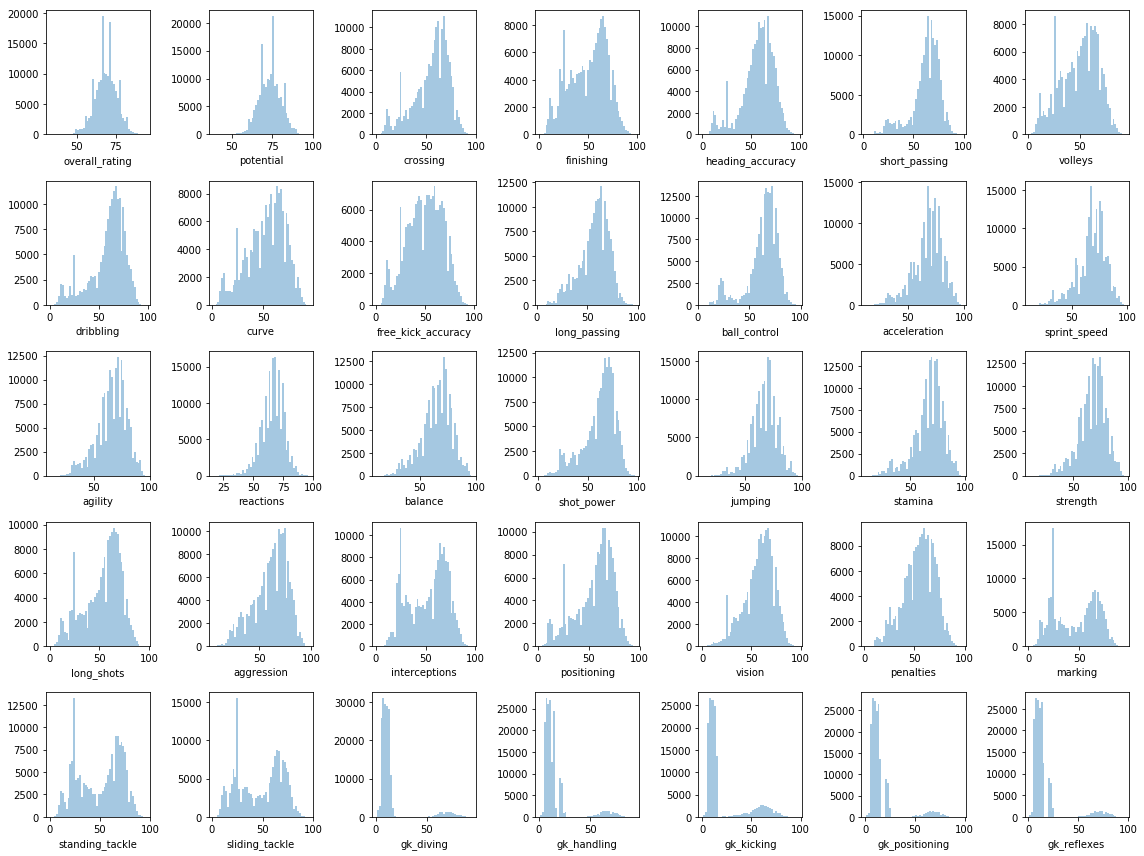

In [51]:
fig5, ax5 = plt.subplots(nrows=5,ncols=7)
fig5.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.distplot(pat.loc[:,j],kde = False,hist = True, ax = ax5[int(i/7)][i%7])
fig5.tight_layout()

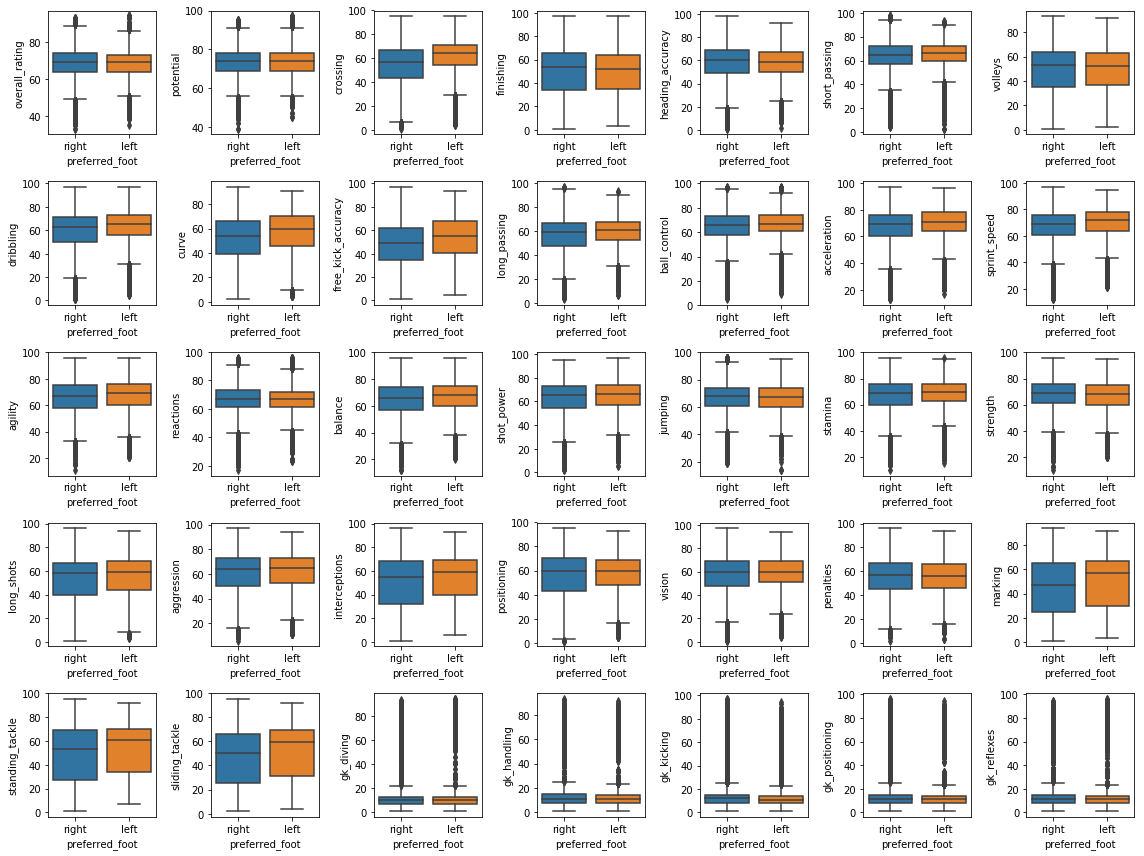

In [52]:
fig6, ax6 = plt.subplots(nrows=5,ncols=7)
fig6.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.boxplot(x = "preferred_foot", y = j, data= pat, ax = ax6[int(i/7)][i%7])
fig6.tight_layout()

Preferred Foot does not distinguish any of the variables. Distribution of features the same regardless of preferred foot

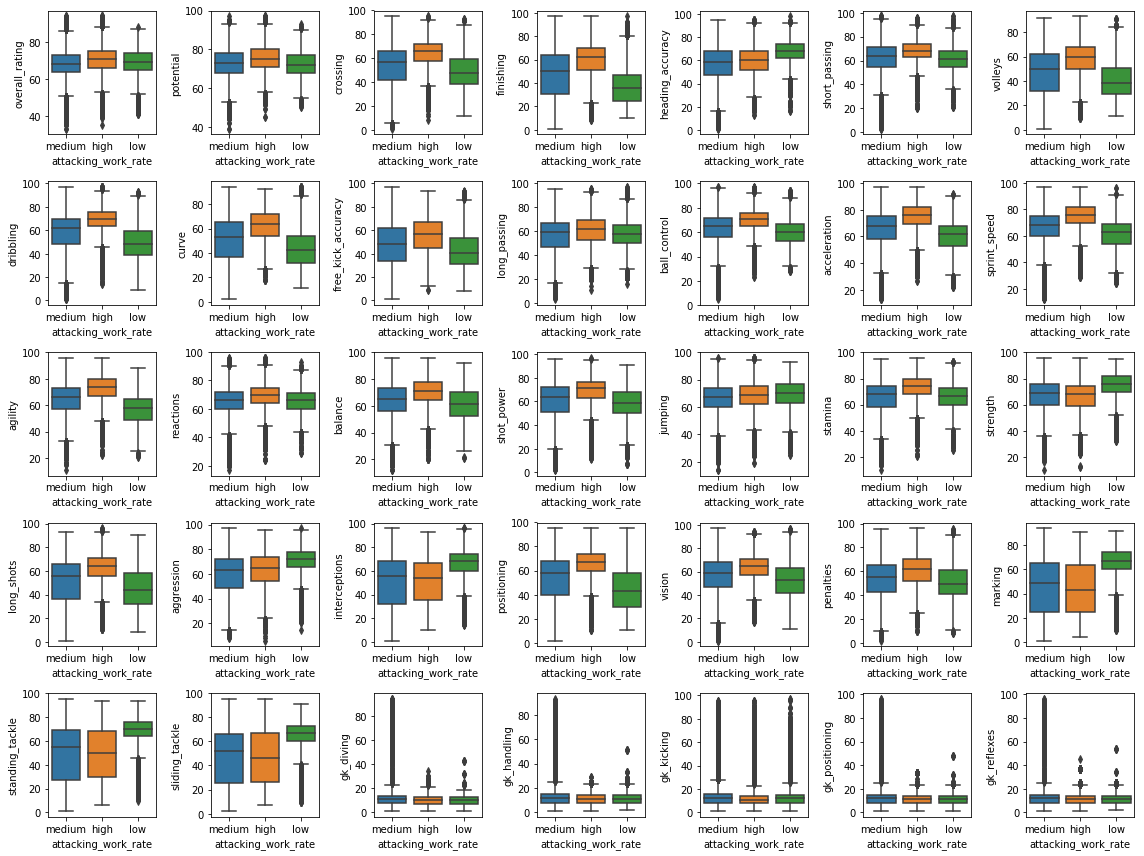

In [54]:
fig7, ax7 = plt.subplots(nrows=5,ncols=7)
fig7.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.boxplot(x = "attacking_work_rate", y = j, data= pat, ax = ax7[int(i/7)][i%7])
fig7.tight_layout()

Attacking work rate does a better job (better than preferred foot) of separating the features but not in a significant manner. Note that it does do a decent job of separating instances with high and low attacking work rate. Also remember that for attacking work rate feature, the factor, Medium', accounts for 70% of the instances. From closer examination, it appears that for features related to atacking attributes, attacking work rate feature does a good job of distinguishing instances of high and low categorical values.

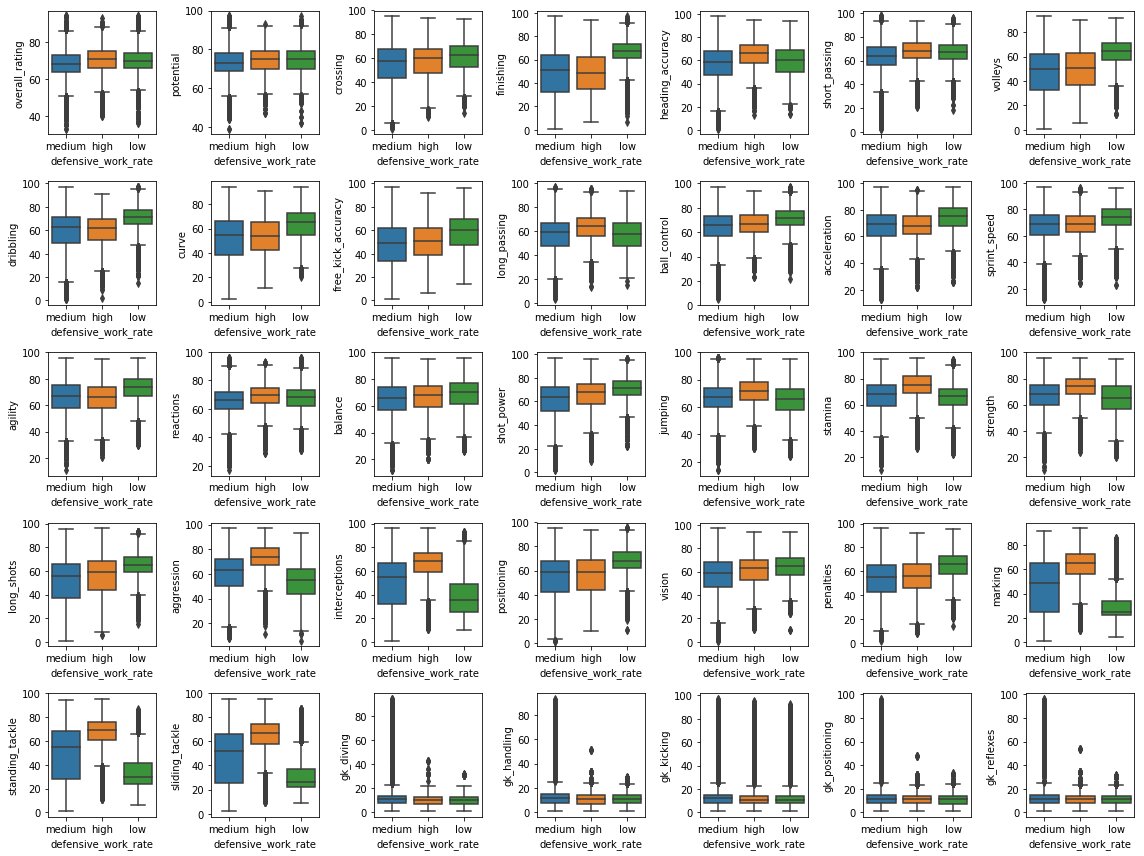

In [55]:
fig8, ax8 = plt.subplots(nrows=5,ncols=7)
fig8.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.boxplot(x = "defensive_work_rate", y = j, data= pat, ax = ax8[int(i/7)][i%7])
fig8.tight_layout()

Similar to attacking work rate, defensive work rate does a better job (better than preferred foot) of separating the features but not in a significant manner. Note that it does do a decent job of separating instances with high and low defensive work rate values for certain features. Also remember that for attacking work rate feature, the factor, Medium', accounts for 70% of the instances. From closer examination, it appears that for features related to defensive attributes, defensive work rate feature does a good job of distinguishing instances of high and low categorical values

# Analyzing Team Table

In [56]:
print("Dimension of Team Table is: {}".format(team_table.shape))
print(100*"*")
print(team_table.info())
print(100*"*")
print(team_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(team_table.describe())
print(100*"*")
print(team_table.isnull().sum(axis=0))

Dimension of Team Table is: (299, 5)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None
****************************************************************************************************
              team_long_name team_short_name
count                    299             299
unique                   296             259
top     Royal Excel Mouscron             POR
freq                       2               3
****************************************************************************************************
                 id    team_api_id  team_fifa_api_id
count    29

In [57]:
team_table[team_table.loc[:,'team_fifa_api_id'].isnull()]


id  team_api_id  team_fifa_api_id                team_long_name  \
8        9         7947               NaN                 FCV Dender EH   
14      15         4049               NaN                        Tubize   
170  26561         6601               NaN                   FC Volendam   
204  34816       177361               NaN  Termalica Bruk-Bet Nieciecza   
208  35286         7992               NaN                      Trofense   
213  35291        10213               NaN                       Amadora   
223  36248         9765               NaN                  Portimonense   
225  36723         4064               NaN                      Feirense   
232  38789         6367               NaN              Uniao da Madeira   
233  38791       188163               NaN                       Tondela   
298  51606         7896               NaN                        Lugano   

    team_short_name  
8               DEN  
14              TUB  
170             VOL  
204             TBN  
208             TRO  
213             AMA  
223             POR  
225             FEI  
232             MAD  
233             TON  
298             LUG

In [58]:
team_table_updated = team_table[~team_table.loc[:,'team_fifa_api_id'].isnull()]

In [59]:
print("Dimension of Team Table Updated is: {}".format(team_table_updated.shape))
print(100*"*")
print(team_table_updated.info())
print(100*"*")
print(team_table_updated.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(team_table_updated.describe())
print(100*"*")
print(team_table_updated.isnull().sum(axis=0))
print(100*"*")
print(team_table_updated.select_dtypes(exclude=['float64','int64']).apply(lambda x: len(x.unique().tolist()),axis = 0))

Dimension of Team Table Updated is: (288, 5)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 297
Data columns (total 5 columns):
id                  288 non-null int64
team_api_id         288 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      288 non-null object
team_short_name     288 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 13.5+ KB
None
****************************************************************************************************
              team_long_name team_short_name
count                    288             288
unique                   285             251
top     Royal Excel Mouscron             GEN
freq                       2               3
****************************************************************************************************
                 id    team_api_id  team_fifa_api_id
cou

In [60]:
print(len(team_table_updated['team_long_name'].unique().tolist()),\
      len(team_table_updated['team_short_name'].unique().tolist()))

285 251


<a id='eda'></a>
## Exploratory Data Analysis (Team Table)



In [61]:
my_team = dict()
for i,j in list(team_table_updated.iloc[:,3:].groupby('team_short_name')):
    my_team[i] = j.iloc[:,0].values.tolist()

In [62]:
{k:v for k,v in my_team.items() if len(v) > 1}
#List of teams with similar short team names

{'AJA': ['AC Ajaccio', 'Ajax'],
 'BAR': ['Bari', 'FC Barcelona'],
 'BAS': ['SC Bastia', 'FC Basel'],
 'BEL': ['GKS Bełchatów', 'CF Os Belenenses', 'AC Bellinzona'],
 'BOL': ['Bolton Wanderers', 'Bologna'],
 'BOU': ['Bournemouth', "US Boulogne Cote D'Opale"],
 'BRA': ['Eintracht Braunschweig', 'SC Braga'],
 'BRE': ['Stade Brestois 29', 'Brescia'],
 'CEL': ['Celtic', 'RC Celta de Vigo'],
 'COR': ['RC Deportivo de La Coruña', 'Córdoba CF'],
 'DOR': ['Borussia Dortmund', 'FC Dordrecht'],
 'GEN': ['KRC Genk', 'KAA Gent', 'Genoa'],
 'GRA': ['De Graafschap', 'Granada CF', 'Grasshopper Club Zürich'],
 'GUI': ['En Avant de Guingamp', 'Vitória Guimarães'],
 'HAM': ['Hamburger SV', 'Hamilton Academical FC'],
 'HER': ['Heracles Almelo', 'Hércules Club de Fútbol'],
 'LEC': ['Lecce', 'Górnik Łęczna'],
 'LEI': ['Leicester City', 'Leixões SC'],
 'LEV': ['Bayer 04 Leverkusen', 'Levante UD'],
 'LIV': ['Liverpool', 'Livorno'],
 'MAL': ['RCD Mallorca', 'Málaga CF'],
 'MAR': ['Olympique de Marseille', 'CS 

# Analyzing Team Attributes Table

In [63]:
print("Dimension of Team Attributes Table is: {}".format(team_att_table.shape))
print(100*"*")
print(team_att_table.info())
print(100*"*")
print(team_att_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(team_att_table.describe())
print(100*"*")
print(team_att_table.isnull().sum(axis=0))

Dimension of Team Attributes Table is: (1458, 25)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing           

Only attribute "buildUpPlayDribbling" has missing values.Look into it. See if other variables at NA instance are strange

In [64]:
team_att_table.loc[team_att_table['buildUpPlayDribbling'].isnull(),:].head()

id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
3   4                77         8485  2010-02-22 00:00:00                70   
4   5                77         8485  2011-02-22 00:00:00                47   
5   6                77         8485  2012-02-22 00:00:00                58   
6   7                77         8485  2013-09-20 00:00:00                62   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
3                  Fast                   NaN                    Little   
4              Balanced                   NaN                    Little   
5              Balanced                   NaN                    Little   
6              Balanced                   NaN                    Little   

   buildUpPlayPassing buildUpPlayPassingClass           ...             \
0                  50                   Mixed           ...              
3                  70                    Long           ...              
4                  52                   Mixed           ...              
5                  62                   Mixed           ...              
6                  45                   Mixed           ...              

  chanceCreationShooting  chanceCreationShootingClass  \
0                     55                       Normal   
3                     70                         Lots   
4                     52                       Normal   
5                     55                       Normal   
6                     55                       Normal   

  chanceCreationPositioningClass  defencePressure defencePressureClass  \
0                      Organised               50               Medium   
3                      Organised               60               Medium   
4                      Organised               47               Medium   
5                      Organised               40               Medium   
6                      Organised               42               Medium   

   defenceAggression defenceAggressionClass defenceTeamWidth  \
0                 55                  Press               45   
3                 70                 Double               70   
4                 47                  Press               52   
5                 40                  Press               60   
6                 42                  Press               60   

   defenceTeamWidthClass defenceDefenderLineClass  
0                 Normal                    Cover  
3                   Wide                    Cover  
4                 Normal                    Cover  
5                 Normal                    Cover  
6                 Normal                    Cover  

[5 rows x 25 columns]

In [65]:
team_att_table.loc[~team_att_table['buildUpPlayDribbling'].isnull(),:].head()

id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
1    2               434         9930  2014-09-19 00:00:00                52   
2    3               434         9930  2015-09-10 00:00:00                47   
7    8                77         8485  2014-09-19 00:00:00                58   
8    9                77         8485  2015-09-10 00:00:00                59   
13  14               614         8576  2014-09-19 00:00:00                59   

   buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
1               Balanced                  48.0                    Normal   
2               Balanced                  41.0                    Normal   
7               Balanced                  64.0                    Normal   
8               Balanced                  64.0                    Normal   
13              Balanced                  57.0                    Normal   

    buildUpPlayPassing buildUpPlayPassingClass           ...             \
1                   56                   Mixed           ...              
2                   54                   Mixed           ...              
7                   62                   Mixed           ...              
8                   53                   Mixed           ...              
13                  52                   Mixed           ...              

   chanceCreationShooting  chanceCreationShootingClass  \
1                      64                       Normal   
2                      64                       Normal   
7                      57                       Normal   
8                      63                       Normal   
13                     52                       Normal   

   chanceCreationPositioningClass  defencePressure defencePressureClass  \
1                       Organised               47               Medium   
2                       Organised               47               Medium   
7                       Organised               41               Medium   
8                       Free Form               49               Medium   
13                      Organised               38               Medium   

    defenceAggression defenceAggressionClass defenceTeamWidth  \
1                  44                  Press               54   
2                  44                  Press               54   
7                  42                  Press               60   
8                  45                  Press               63   
13                 47                  Press               53   

    defenceTeamWidthClass defenceDefenderLineClass  
1                  Normal                    Cover  
2                  Normal                    Cover  
7                  Normal                    Cover  
8                  Normal                    Cover  
13                 Normal                    Cover  

[5 rows x 25 columns]

Does not seem to be related to the other featues and more than 50% of the features are missing. In order to not skew data, drop feaure from dataset and continue analyzing the rest

### Data Cleaning 

In [66]:
team_att_table_updated1 = team_att_table.drop(['buildUpPlayDribbling'],axis = 1)
print("Dimension of Team Attributes Table updated is: {}".format(team_att_table_updated1.shape))
print(100*"*")
print(team_att_table_updated1.info())
print(100*"*")
print(team_att_table_updated1.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(team_att_table_updated1.describe())
print(100*"*")
print(team_att_table_updated1.isnull().sum(axis=0))

Dimension of Team Attributes Table updated is: (1458, 24)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClas

<a id='eda'></a>
## Exploratory Data Analysis (Team Attributes Table)



In [80]:
tat = team_att_table_updated1.loc[:,team_att_table_updated1.columns.tolist()[3:]]

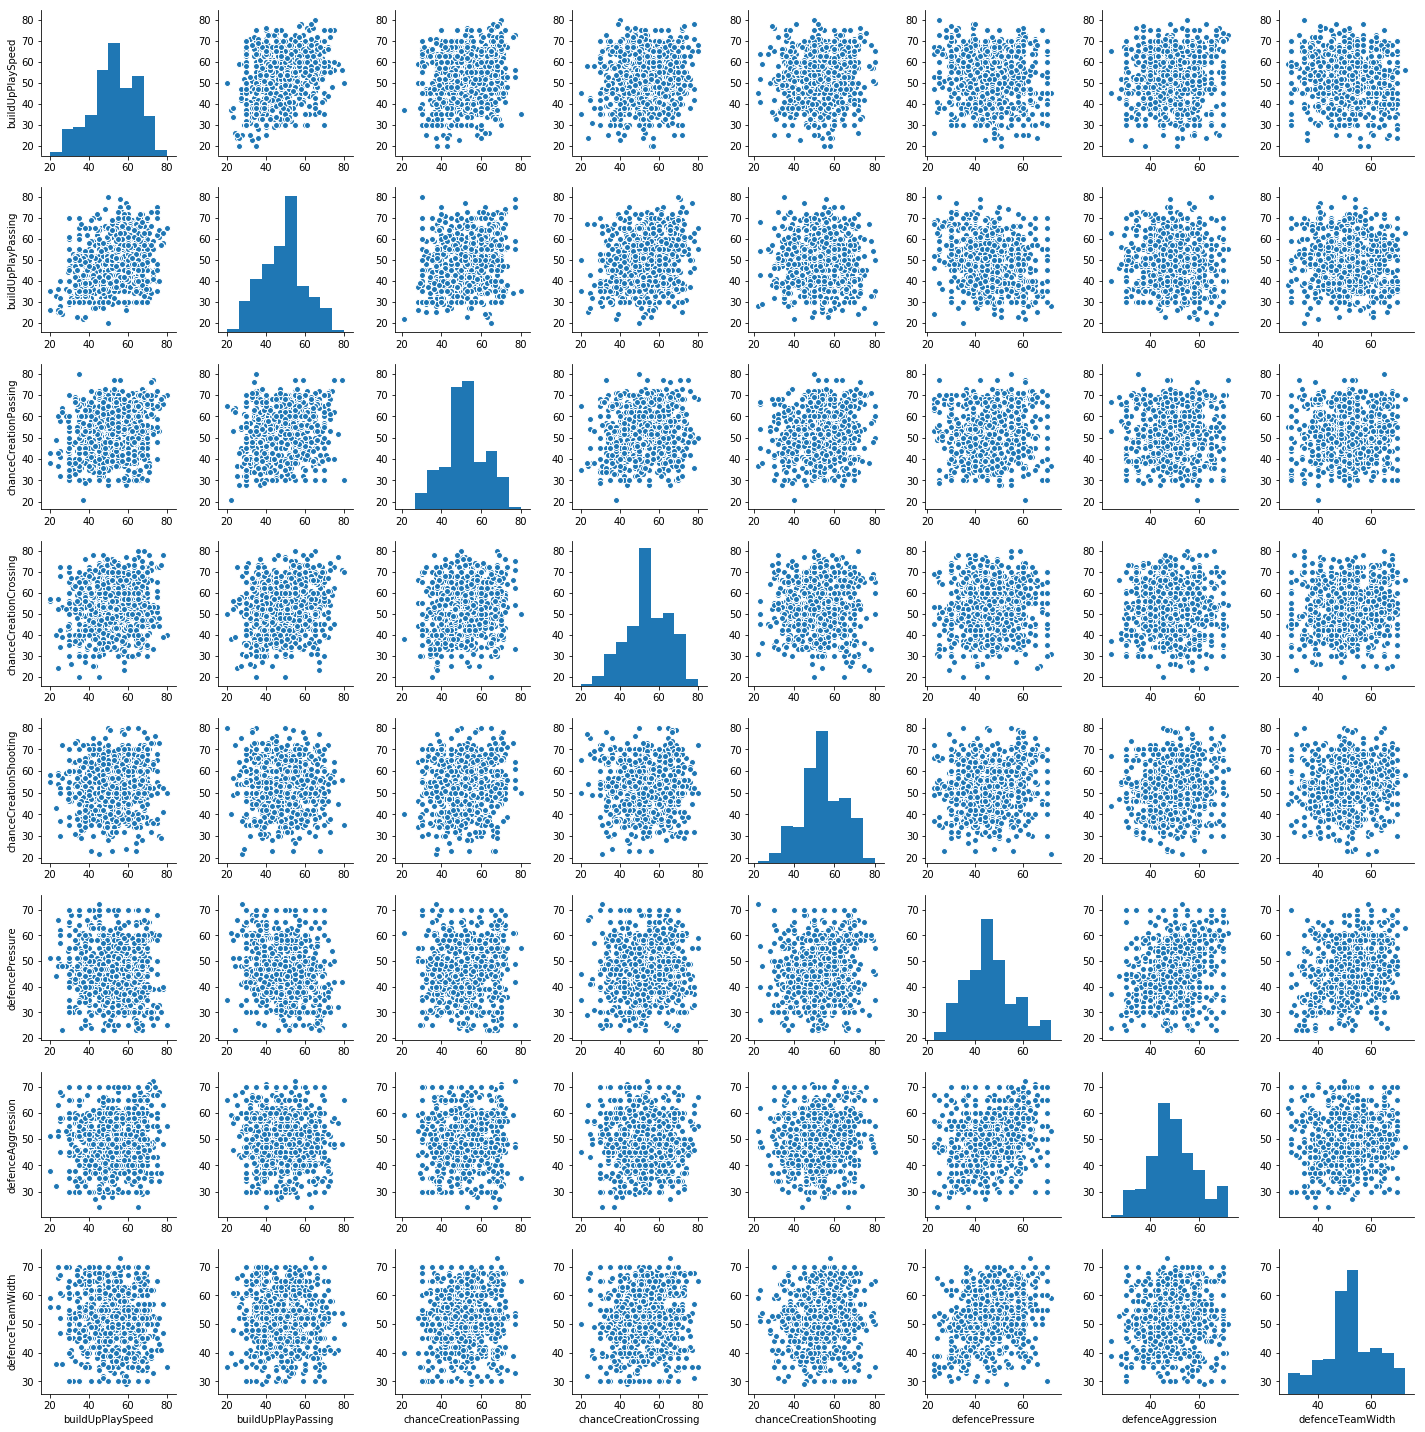

In [81]:
sns.pairplot(tat)
#Little to no correlation beween any of the continuous features

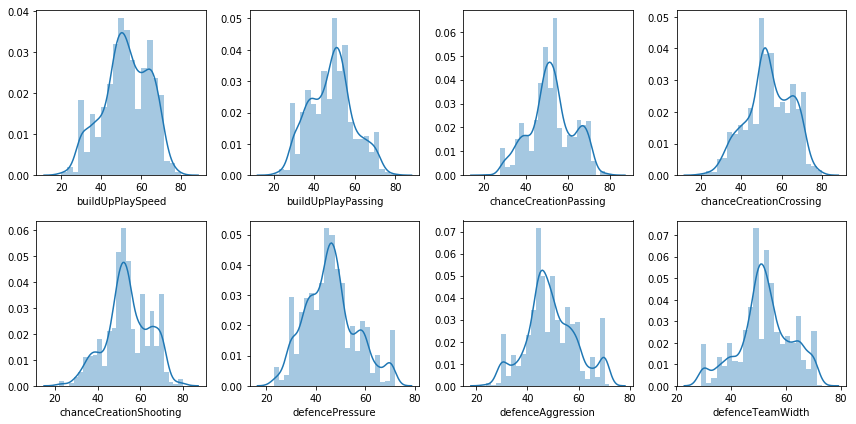

In [82]:
fig9, ax9 = plt.subplots(nrows=2,ncols=4)
fig9.set_size_inches(12,6)
for i,j in enumerate(team_att_table_updated1.select_dtypes(include = ['int64']).columns[3:].tolist()):
    sns.distplot(tat.loc[:,j],kde =True,hist = True, ax = ax9[int(i/4)][i%4])
fig9.tight_layout()

None of the continuous features are normaly distributted or appear to follow exponential family distributions. Multimodal maybe?

In [83]:
team_att_table_updated1.select_dtypes(include = ['int64']).head()

id  team_fifa_api_id  team_api_id  buildUpPlaySpeed  buildUpPlayPassing  \
0   1               434         9930                60                  50   
1   2               434         9930                52                  56   
2   3               434         9930                47                  54   
3   4                77         8485                70                  70   
4   5                77         8485                47                  52   

   chanceCreationPassing  chanceCreationCrossing  chanceCreationShooting  \
0                     60                      65                      55   
1                     54                      63                      64   
2                     54                      63                      64   
3                     70                      70                      70   
4                     53                      48                      52   

   defencePressure  defenceAggression  defenceTeamWidth  
0               50                 55                45  
1               47                 44                54  
2               47                 44                54  
3               60                 70                70  
4               47                 47                52

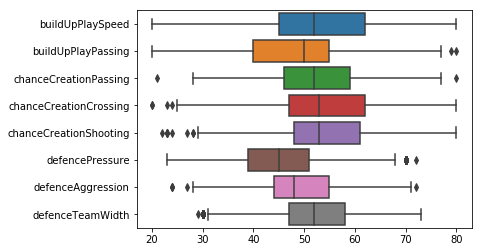

In [71]:
sns.boxplot(data = team_att_table_updated1.select_dtypes(include = ['int64']).iloc[:,3:],\
           orient = 'h')

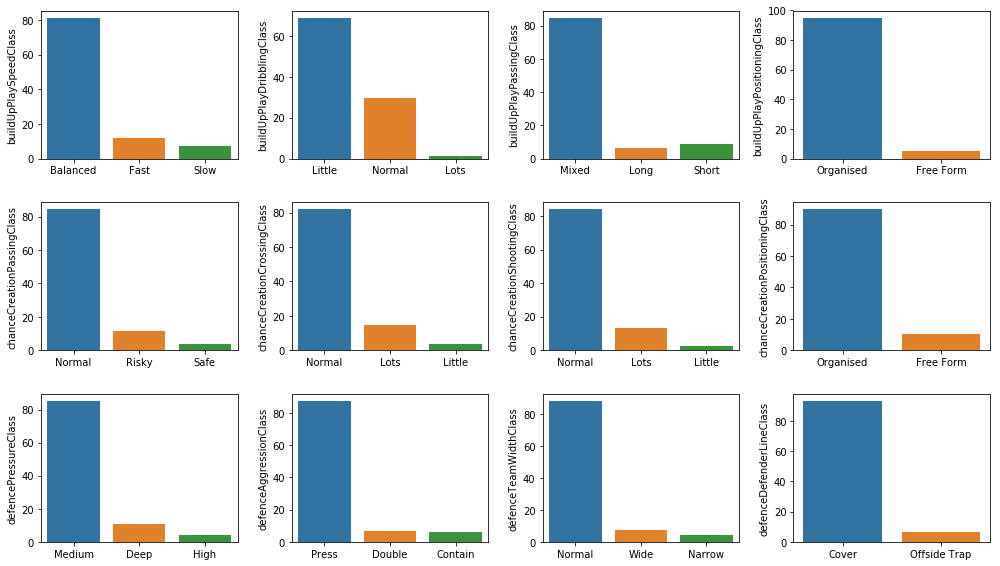

In [72]:
fig9, ax9 = plt.subplots(nrows=3,ncols=4)
fig9.set_size_inches(14,8)
for i,j in enumerate(team_att_table_updated1.select_dtypes(include = ['object']).columns[1:].tolist()):
    #sns.countplot(tat.loc[:,j], ax = ax9[int(i/4)][i%4])
    sns.barplot(x = j, y = j, data = tat,\
            estimator = lambda x: len(x)/len(tat) * 100, ax = ax9[int(i/4)][i%4],\
           orient = 'v')
    ax9[int(i/4)][i%4].set(xlabel = "")
fig9.tight_layout()

In [73]:
tat.select_dtypes(include = ['int64']).columns.tolist()


['buildUpPlaySpeed',
 'buildUpPlayPassing',
 'chanceCreationPassing',
 'chanceCreationCrossing',
 'chanceCreationShooting',
 'defencePressure',
 'defenceAggression',
 'defenceTeamWidth']

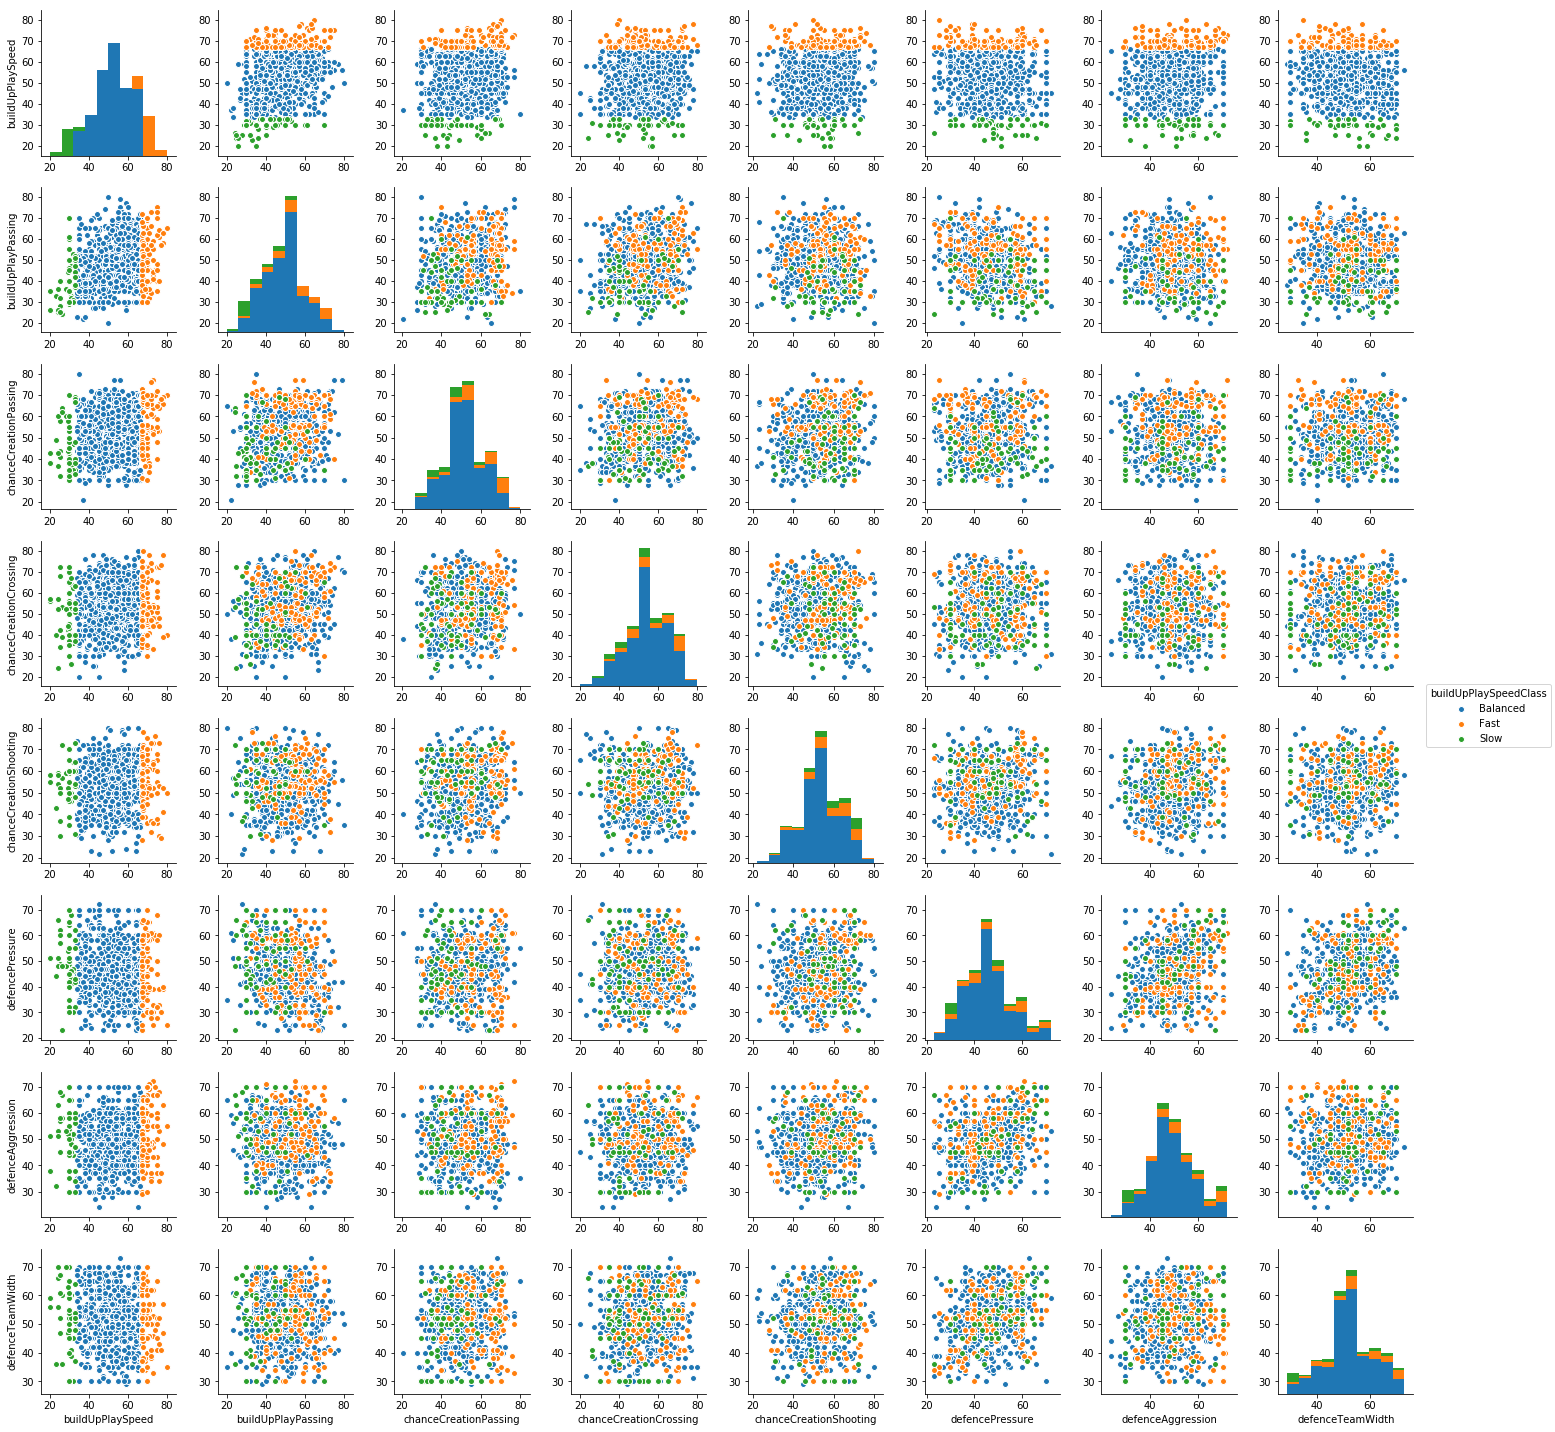

In [74]:
sns.pairplot(tat,hue = tat.select_dtypes(include = ['object']).\
          columns.tolist()[1]) 

When build up play speed is plotted versus the remaining features, build up play speed class appears to perfectly distinguish the plot into sections. This makes sense because as build up play increases in value, the categorical feature of the observation changes from slow to balanced to fast. Most likely, the build up play speed variable was cut into three different and distinct regions, creating the build up play speed class. Either feature can be used (build up play speed or build up play speed class for prediction) but not both since they represent the same thing. Same principle applies for:

Build up play speed
Build up play passing
Chance creation passing
Chance creation crossing
Chance creation shooting
Defense pressure
Defense aggression
Defense team width

As for the remaining continuous features, the remaining categorical variables do a poor job of separating/clustering the data. See below for an example

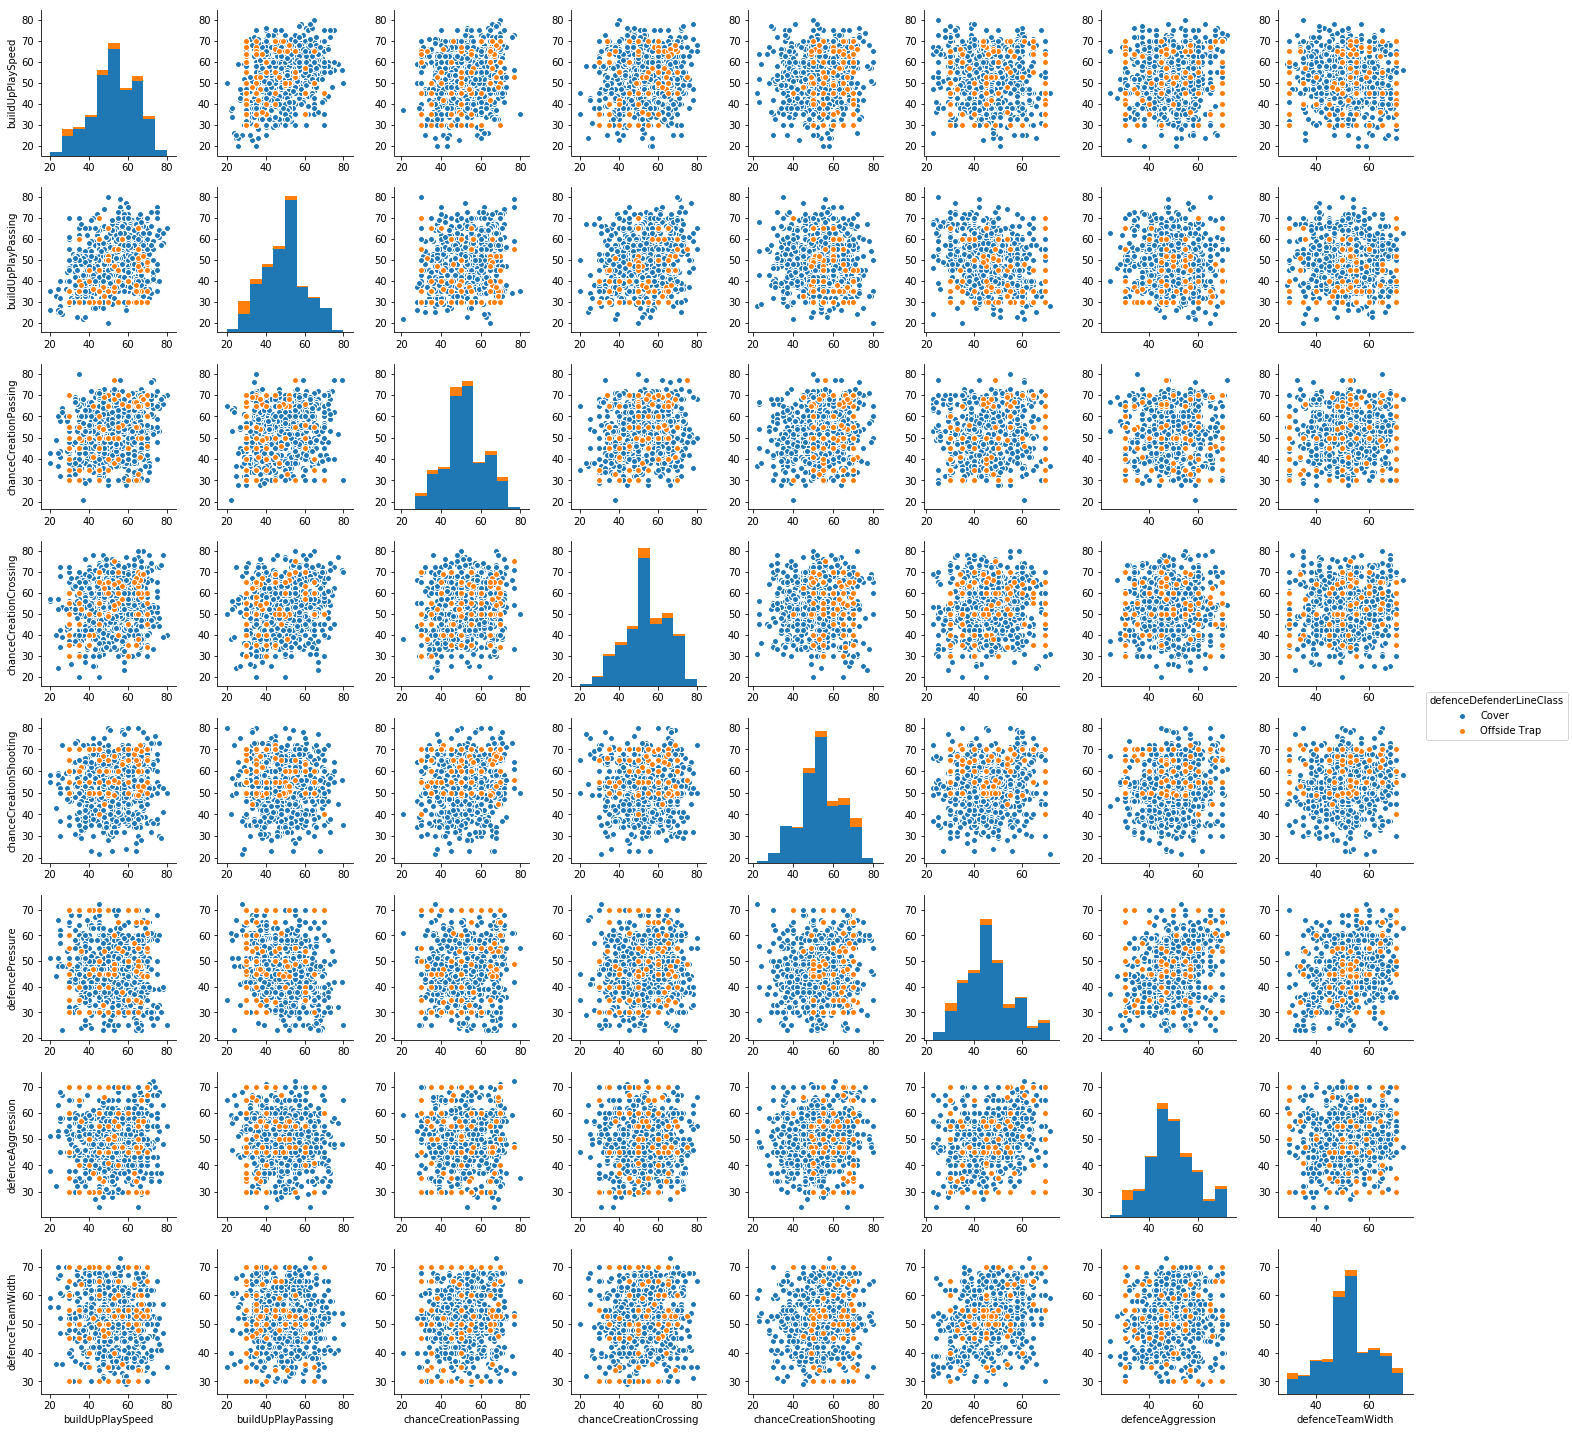

In [75]:
sns.pairplot(tat,hue = tat.select_dtypes(include = ['object']).\
          columns.tolist()[12]) 

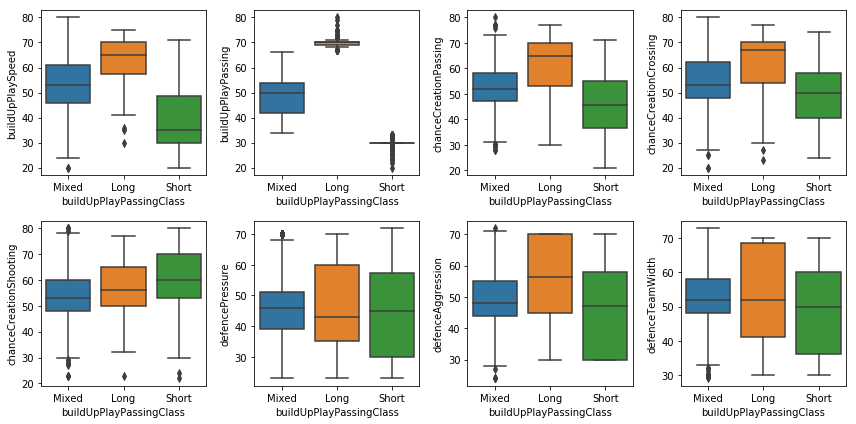

In [76]:
fig9, ax9 = plt.subplots(nrows=2,ncols=4)
fig9.set_size_inches(12,6)
for i,j in enumerate(team_att_table_updated1.select_dtypes(include = ['int64']).columns[3:].tolist()):
    sns.boxplot(data = tat, y = j, x = tat.select_dtypes(include = ['object']).columns[3],\
                                                      ax = ax9[int(i/4)][i%4])
fig9.tight_layout()

Boxplots, as displayed above, also confirm the fact that some continuous and categorical features are duplicates of each other since the categorical features do an amazing job of separating its respective continuous feature

<a id='conclusions'></a>
## Conclusions

Analyzing the league, country, player, player attributes, team and team atributes tables gave a better understanding of the data. Once the respective features are joined and merged with the match table, machine learning algorithms can be used to predict the winner of the future soccer matches in the european league. This kernel also allows for the opportunity to practice using the seaborn library and visualizing the data
 



Due to the time restriction, i would like to mention that i have visited Kaggle, copied some of the code, i understood the majority of those copied code, then populated the current Projects fields. 
Hopefully in the future i can create all the code myself.  


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])